<a href="https://colab.research.google.com/github/btkcodedev/ml-projects/blob/main/Predicting-house-prices-above-or-below-median.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Used Neural Network Within Keras For Building The ANN For Project

In [ ]:
#Help Referenced: https://medium.com/intuitive-deep-learning/build-your-first-neural-network-to-predict-house-prices-with-keras-eb5db60232c
import pandas as pd

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/housepricedata.csv')

In [ ]:
df.head()

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1


In [ ]:
df

,LotArea,OverallQual,OverallCond,TotalBsmtSF,FullBath,HalfBath,BedroomAbvGr,TotRmsAbvGrd,Fireplaces,GarageArea,AboveMedianPrice
0,8450,7,5,856,2,1,3,8,0,548,1
1,9600,6,8,1262,2,0,3,6,1,460,1
2,11250,7,5,920,2,1,3,6,1,608,1
3,9550,7,5,756,1,0,3,7,1,642,0
4,14260,8,5,1145,2,1,4,9,1,836,1
...,...,...,...,...,...,...,...,...,...,...,...
1455,7917,6,5,953,2,1,3,7,1,460,1
1456,13175,6,6,1542,2,0,3,7,2,500,1
1457,9042,7,9,1152,2,0,4,9,2,252,1
1458,9717,5,6,1078,1,0,2,5,0,240,0


In [ ]:
dataset = df.values  #Make it an array

In [ ]:
dataset

array([[ 8450,     7,     5, ...,     0,   548,     1],
       [ 9600,     6,     8, ...,     1,   460,     1],
       [11250,     7,     5, ...,     1,   608,     1],
       ...,
       [ 9042,     7,     9, ...,     2,   252,     1],
       [ 9717,     5,     6, ...,     0,   240,     0],
       [ 9937,     5,     6, ...,     0,   276,     0]])

In [ ]:
len(df.columns) #For splitting purpose

11

In [ ]:
x = dataset[:,0:10] #Spilt to 'every row', 'columnrange(0 to 9)'

In [ ]:
x

array([[ 8450,     7,     5, ...,     8,     0,   548],
       [ 9600,     6,     8, ...,     6,     1,   460],
       [11250,     7,     5, ...,     6,     1,   608],
       ...,
       [ 9042,     7,     9, ...,     9,     2,   252],
       [ 9717,     5,     6, ...,     5,     0,   240],
       [ 9937,     5,     6, ...,     6,     0,   276]])

In [ ]:
y = dataset[:,10] #Spilt to 'every row', 'column(10)'

In [ ]:
y

array([1, 1, 1, ..., 1, 0, 0])

In [ ]:
# Preprocessing for cleansing
from sklearn import preprocessing

In [ ]:
minmaxscaler = preprocessing.MinMaxScaler()

In [ ]:
xscale = minmaxscaler.fit_transform(x)

In [ ]:
xscale

array([[0.0334198 , 0.66666667, 0.5       , ..., 0.5       , 0.        ,
        0.3864598 ],
       [0.03879502, 0.55555556, 0.875     , ..., 0.33333333, 0.33333333,
        0.32440056],
       [0.04650728, 0.66666667, 0.5       , ..., 0.33333333, 0.33333333,
        0.42877292],
       ...,
       [0.03618687, 0.66666667, 1.        , ..., 0.58333333, 0.66666667,
        0.17771509],
       [0.03934189, 0.44444444, 0.625     , ..., 0.25      , 0.        ,
        0.16925247],
       [0.04037019, 0.44444444, 0.625     , ..., 0.33333333, 0.        ,
        0.19464034]])

In [ ]:
# Separating training and testing dataset
from sklearn.model_selection import train_test_split

In [ ]:
#Separating training and testing dataset
# Total dataset = 100% = 1500 items
# Training = 70% = 1050 items
# Testing & Validation = 30% = 450 items
xtrain, xvaltest, ytrain, yvaltest = train_test_split(xscale, y, test_size = 0.3)

In [ ]:
# Separating validation and testing dataset
# Validation = 15% = 225 items
# Testing = 15% = 225 items
xval, xtest, yval, ytest = train_test_split(xvaltest, yvaltest, test_size = 0.5)

In [ ]:
print(xtrain.shape, xval.shape, xtest.shape, ytrain.shape, yval.shape, ytest.shape)
# 1460 data points are available, other 40 are excluded during the preprocessing

(1022, 10) (219, 10) (219, 10) (1022,) (219,) (219,)


In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model = Sequential([
                    #Dense refers to fully connected layers
                    Dense(32, activation="relu", input_shape=(10,)),  #First Hidden Layer 
                    Dense(32, activation="relu"), #Second Hidden Layer
                    Dense(1, activation="sigmoid"),
])

In [ ]:
model.compile(
    optimizer= "sgd", #‘sgd’ refers to stochastic gradient descent
    loss = "binary_crossentropy", #The loss function for outputs that take the values 1 or 0 is called binary cross entropy
    metrics = ['accuracy'] #Also track accuracy
)

In [ ]:
hist = model.fit(
    xtrain, ytrain,
    batch_size=32, epochs= 100,
    validation_data=(xval, yval)
)

Epoch 1/100
32/32 [==============================] - 1s 7ms/step - loss: 0.6952 - accuracy: 0.4961 - val_loss: 0.6897 - val_accuracy: 0.5662
Epoch 2/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6878 - accuracy: 0.5558 - val_loss: 0.6823 - val_accuracy: 0.5799
Epoch 3/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6820 - accuracy: 0.5245 - val_loss: 0.6761 - val_accuracy: 0.5799
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6766 - accuracy: 0.5382 - val_loss: 0.6709 - val_accuracy: 0.5936
Epoch 5/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6719 - accuracy: 0.5890 - val_loss: 0.6662 - val_accuracy: 0.6119
Epoch 6/100
32/32 [==============================] - 0s 2ms/step - loss: 0.6670 - accuracy: 0.6282 - val_loss: 0.6615 - val_accuracy: 0.6438
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6621 - accuracy: 0.6350 - val_loss: 0.6569 - val_accuracy: 0.7032
Epoch 8/100
3

In [ ]:
loss, accuracy = model.evaluate(xtest, ytest)
print(xtest.shape, ytest.shape)

7/7 [==============================] - 0s 2ms/step - loss: 0.3020 - accuracy: 0.8767
(219, 10) (219,)


In [ ]:
print(loss, accuracy)

0.3020112216472626 0.8767123222351074


In [ ]:
# Finding wheather overfits or not
import matplotlib.pyplot as plt

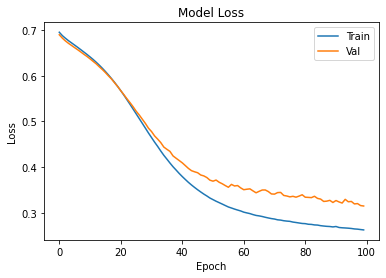

In [ ]:
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.legend(['Train', 'Val'], loc="upper right")  #Training & validation loss
plt.show()

In [ ]:
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['Train', 'Val'], loc="upper right")  #Training & validation accuracy
plt.show()

In [ ]:
#Building Overfitting model
modeltwo = Sequential([
        Dense(1000, activation='relu', input_shape=(10,)),
        Dense(1000, activation="relu"),
        Dense(1000, activation="relu"),
        Dense(1000, activation="relu"),
        Dense(1, activation="sigmoid")
])

In [ ]:
modeltwo.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics = ['accuracy']
)

In [ ]:
hist2 = modeltwo.fit(
    xtrain, ytrain,
    batch_size=32, epochs=100,
    validation_data=(xval,yval)
)

Epoch 1/100
32/32 [==============================] - 1s 40ms/step - loss: 0.1096 - accuracy: 0.9501 - val_loss: 0.4754 - val_accuracy: 0.8767
Epoch 2/100
32/32 [==============================] - 1s 35ms/step - loss: 0.0949 - accuracy: 0.9589 - val_loss: 0.4775 - val_accuracy: 0.8630
Epoch 3/100
32/32 [==============================] - 1s 43ms/step - loss: 0.1186 - accuracy: 0.9550 - val_loss: 0.4192 - val_accuracy: 0.8630
Epoch 4/100
32/32 [==============================] - 1s 44ms/step - loss: 0.1152 - accuracy: 0.9521 - val_loss: 0.3150 - val_accuracy: 0.8858
Epoch 5/100
32/32 [==============================] - 1s 36ms/step - loss: 0.1523 - accuracy: 0.9315 - val_loss: 0.3776 - val_accuracy: 0.8813
Epoch 6/100
32/32 [==============================] - 1s 35ms/step - loss: 0.1156 - accuracy: 0.9560 - val_loss: 0.4573 - val_accuracy: 0.8858
Epoch 7/100
32/32 [==============================] - 1s 35ms/step - loss: 0.1146 - accuracy: 0.9530 - val_loss: 0.5460 - val_accuracy: 0.8721
Epoch 

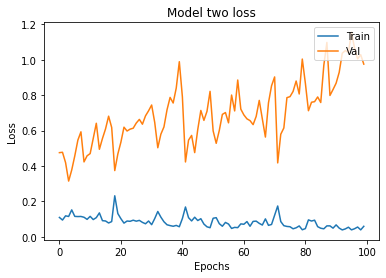

In [ ]:
plt.title('Model two loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.plot(hist2.history['loss'])
plt.plot(hist2.history['val_loss'])
plt.legend(['Train','Val'], loc="upper right")
plt.show() #Overfit Confirmed with inflexion point of Epoch 20

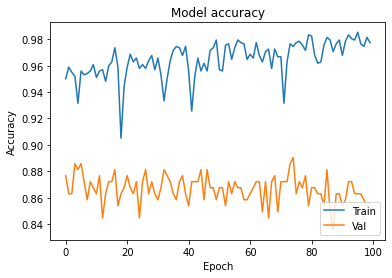

In [ ]:
plt.plot(hist2.history['accuracy'])
plt.plot(hist2.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='lower right')
plt.show()

In [ ]:
from keras.layers import Dropout
from keras import regularizers

In [ ]:
model_3 = Sequential([
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01), input_shape=(10,)), #Added L2 regularization
    #This tells Keras to include the squared values of those parameters in our overall loss function, and weight them by 0.01 in the loss function.
    Dropout(0.3), #neurons in the previous layer has a probability of 0.3 in dropping out during training
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1000, activation='relu', kernel_regularizer=regularizers.l2(0.01)),
    Dropout(0.3),
    Dense(1, activation='sigmoid', kernel_regularizer=regularizers.l2(0.01)),
])

In [ ]:
# model that survives overfittin using L2 regiularization and dropout
model_3.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])
hist_3 = model_3.fit(xtrain, ytrain,
          batch_size=32, epochs=100,
          validation_data=(xval, yval))

Epoch 1/100
32/32 [==============================] - 3s 53ms/step - loss: 14.2239 - accuracy: 0.6184 - val_loss: 3.8970 - val_accuracy: 0.7808
Epoch 2/100
32/32 [==============================] - 2s 61ms/step - loss: 1.6551 - accuracy: 0.8415 - val_loss: 0.6824 - val_accuracy: 0.8356
Epoch 3/100
32/32 [==============================] - 2s 62ms/step - loss: 0.5455 - accuracy: 0.8748 - val_loss: 0.6231 - val_accuracy: 0.8174
Epoch 4/100
32/32 [==============================] - 2s 49ms/step - loss: 0.5046 - accuracy: 0.8738 - val_loss: 0.5600 - val_accuracy: 0.8356
Epoch 5/100
32/32 [==============================] - 2s 61ms/step - loss: 0.4780 - accuracy: 0.8777 - val_loss: 0.5340 - val_accuracy: 0.8311
Epoch 6/100
32/32 [==============================] - 2s 62ms/step - loss: 0.4737 - accuracy: 0.8845 - val_loss: 0.4940 - val_accuracy: 0.8539
Epoch 7/100
32/32 [==============================] - 1s 45ms/step - loss: 0.4878 - accuracy: 0.8679 - val_loss: 0.5353 - val_accuracy: 0.8447
Epoch

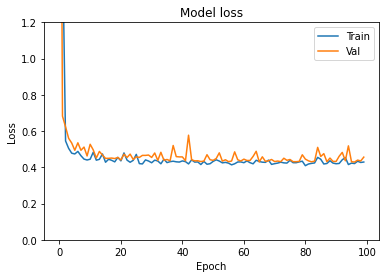

In [ ]:
plt.plot(hist_3.history['loss'])
plt.plot(hist_3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0) #window is zoomed in between 0 and 1.2 for the loss
plt.show()

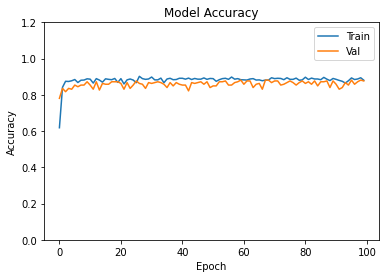

In [ ]:
plt.plot(hist_3.history['accuracy'])
plt.plot(hist_3.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper right')
plt.ylim(top=1.2, bottom=0) #window is zoomed in between 0 and 1.2 for the loss
plt.show()